In [1]:
import numpy as np
from main import nmf_son, nmf_son_acc
import matplotlib.pyplot as plt

np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
def load_results(filepath):
    data = np.load(filepath)
    return data['Wb'], data['Hb'], data['Wl'], data['Hl'], data['fscores'], data['gscores'], data['lambda_vals']

def save_results(filepath, Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals):
    with open(filepath, 'wb') as fout:
        np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

In [3]:
X = np.load('urban/2022_11_17/small/X.npz')['X']

In [4]:
acc_filepath = 'urban/2022_11_28/acc_testing/r{}_it{}_l{}_{}.npz'

## Rank = 6

In [5]:
# data = np.load('urban/2022_11_17/small/r6_ini.npz')
rank = 6
ini_W = np.random.rand(X.shape[0], rank)
ini_H = np.random.rand(rank, X.shape[1])

In [6]:
reg = 2
iters = 500
aa_size = 2

In [7]:
%%time
Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters)

CPU times: total: 29min 33s
Wall time: 15min 20s


In [8]:
save_results(acc_filepath.format(rank, iters, reg, 'base'), Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base)
# Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base = load_results(acc_filepath.format(rank, iters, reg, 'base'))

In [9]:
%%time
Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=aa_size)

CPU times: total: 44min 32s
Wall time: 22min 56s


In [10]:
save_results(acc_filepath.format(rank, iters, reg, 'z2'), Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2)
# Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2 = load_results(acc_filepath.format(rank, iters, reg, 'z2'))

In [11]:
%%time
Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=aa_size)

c:\Users\waqas\Desktop\seminmf\main.py:211: RuntimeWarning: invalid value encountered in double_scalars
  if np.linalg.norm(new_z - z) / np.linalg.norm(z) < TOL:
c:\Users\waqas\miniconda3\envs\research\lib\site-packages\numpy\linalg\linalg.py:2557: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
c:\Users\waqas\miniconda3\envs\research\lib\site-packages\numpy\linalg\linalg.py:2556: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
c:\Users\waqas\Desktop\seminmf\main.py:365: RuntimeWarning: invalid value encountered in double_scalars
  scaled_lambda = lambda_vals[it] = (fscores[it] / gscores[it]) * _lambda


CPU times: total: 4h 53min 59s
Wall time: 2h 30min 16s


In [12]:
save_results(acc_filepath.format(rank, iters, reg, 'all2'), Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2)
# Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2 = load_results(acc_filepath.format(rank, iters, reg, 'all2'))

In [13]:
%%time
Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc = nmf_son_acc(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters)

CPU times: total: 15min 36s
Wall time: 7min 57s


In [14]:
save_results(acc_filepath.format(rank, iters, reg, 'acc'), Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc)
# Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc = load_results(acc_filepath.format(rank, iters, reg, 'acc'))

In [15]:
total_scores_base = fscores_base + lambda_vals_base * gscores_base
total_scores_z2 = fscores_z2 + lambda_vals_z2 * gscores_z2
total_scores_all2 = fscores_all2+ lambda_vals_all2 * gscores_all2
total_scores_acc = fscores_acc + lambda_vals_acc * gscores_acc

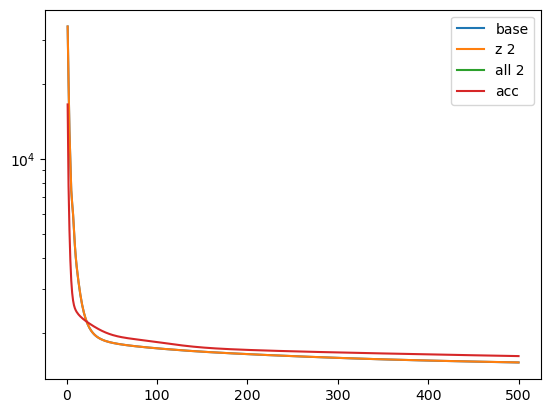

In [16]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_all2)
plt.plot(total_scores_acc)
plt.legend(['base', 'z 2', 'all 2', 'acc'])

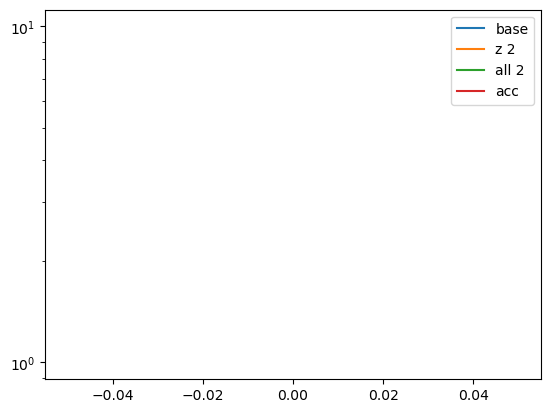

In [17]:
min_val = np.min([total_scores_base[1:], total_scores_z2[1:], total_scores_all2[1:], total_scores_acc[1:]])

plt.yscale('log')
plt.plot(total_scores_base - min_val)
plt.plot(total_scores_z2 - min_val)
plt.plot(total_scores_all2 - min_val)
plt.plot(total_scores_acc - min_val)
plt.legend(['base', 'z 2', 'all 2', 'acc'])

In [18]:
Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=3)
Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=4)

In [19]:
save_results(acc_filepath.format(rank, iters, reg, 'z3'), Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3)
save_results(acc_filepath.format(rank, iters, reg, 'z4'), Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4)
# Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3 = load_results(acc_filepath.format(rank, iters, reg, 'z3'))
# Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4 = load_results(acc_filepath.format(rank, iters, reg, 'z4'))

In [20]:
total_scores_z3 = fscores_z3 + lambda_vals_z3 * gscores_z3
total_scores_z4 = fscores_z4 + lambda_vals_z4 * gscores_z4

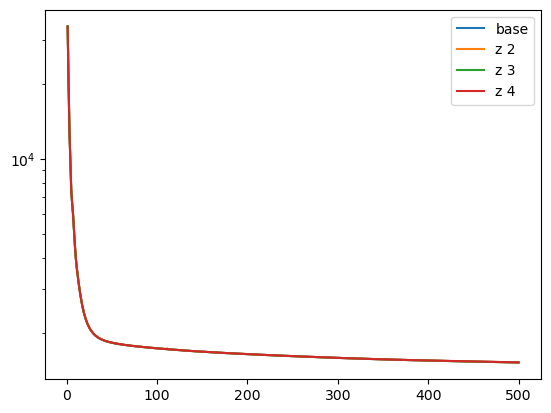

In [21]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_z3)
plt.plot(total_scores_z4)
plt.legend(['base', 'z 2', 'z 3', 'z 4'])

In [22]:
Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=3)
Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=4)

c:\Users\waqas\Desktop\seminmf\main.py:64: RuntimeWarning: overflow encountered in matmul
  new_wf = (Mj @ hj.T - yf + rho * z) / (rho + hj_norm_sq)
c:\Users\waqas\Desktop\seminmf\main.py:64: RuntimeWarning: invalid value encountered in divide
  new_wf = (Mj @ hj.T - yf + rho * z) / (rho + hj_norm_sq)
c:\Users\waqas\Desktop\seminmf\main.py:168: RuntimeWarning: overflow encountered in matmul
  new_wf = (Mj @ hj.T - yf + rho * z) / (rho + hj_norm_sq)


In [23]:
save_results(acc_filepath.format(rank, iters, reg, 'all3'), Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3)
save_results(acc_filepath.format(rank, iters, reg, 'all4'), Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4)
# Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3 = load_results(acc_filepath.format(rank, iters, reg, 'all3'))
# Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4 = load_results(acc_filepath.format(rank, iters, reg, 'all4'))

In [24]:
total_scores_all3 = fscores_all3 + lambda_vals_all3 * gscores_all3
total_scores_all4 = fscores_all4 + lambda_vals_all4 * gscores_all4

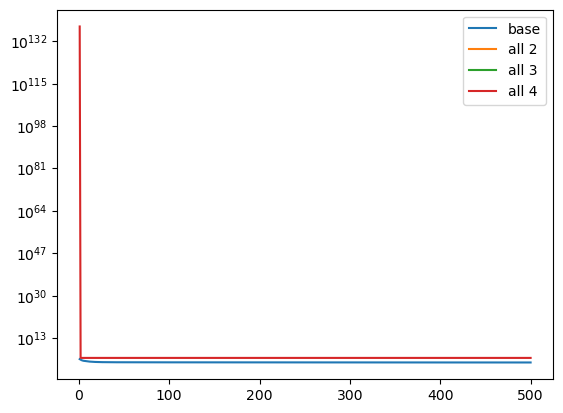

In [25]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_all2)
plt.plot(total_scores_all3)
plt.plot(total_scores_all4)
plt.legend(['base', 'all 2', 'all 3', 'all 4'])

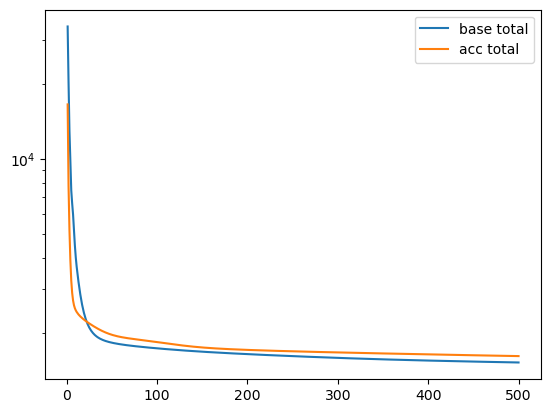

In [26]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_acc)

plt.legend(['base total', 'acc total'])

## Rank = 3

In [27]:
# data = np.load('urban/2022_11_17/small/r6_ini.npz')
rank = 3
ini_W = np.random.rand(X.shape[0], rank)
ini_H = np.random.rand(rank, X.shape[1])

In [28]:
reg = 2
iters = 500
aa_size = 2

In [29]:
%%time
Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters)

CPU times: total: 10min 30s
Wall time: 5min 21s


In [30]:
save_results(acc_filepath.format(rank, iters, reg, 'base'), Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base)
# Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base = load_results(acc_filepath.format(rank, iters, reg, 'base'))

In [31]:
%%time
Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=aa_size)

c:\Users\waqas\Desktop\seminmf\main.py:122: RuntimeWarning: invalid value encountered in double_scalars
  if np.linalg.norm(new_z - z) / np.linalg.norm(z) < TOL:


CPU times: total: 27min 1s
Wall time: 13min 44s


In [32]:
save_results(acc_filepath.format(rank, iters, reg, 'z2'), Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2)
# Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2 = load_results(acc_filepath.format(rank, iters, reg, 'z2'))

In [33]:
%%time
Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=aa_size)

CPU times: total: 1h 41min 34s
Wall time: 51min 29s


In [34]:
save_results(acc_filepath.format(rank, iters, reg, 'all2'), Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2)
# Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2 = load_results(acc_filepath.format(rank, iters, reg, 'all2'))

In [35]:
%%time
Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc = nmf_son_acc(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters)

CPU times: total: 7min 30s
Wall time: 3min 48s


In [36]:
save_results(acc_filepath.format(rank, iters, reg, 'acc'), Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc)
# Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc = load_results(acc_filepath.format(rank, iters, reg, 'acc'))

In [37]:
total_scores_base = fscores_base + lambda_vals_base * gscores_base
total_scores_z2 = fscores_z2 + lambda_vals_z2 * gscores_z2
total_scores_all2 = fscores_all2+ lambda_vals_all2 * gscores_all2
total_scores_acc = fscores_acc + lambda_vals_acc * gscores_acc

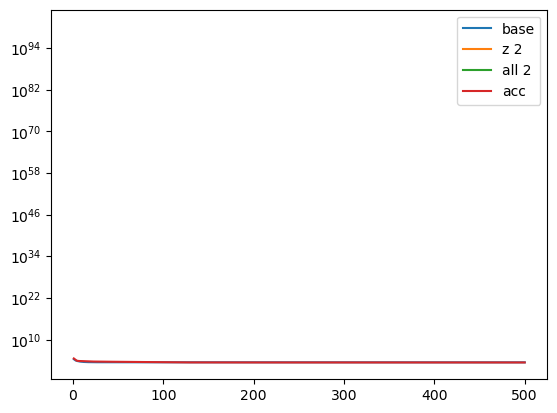

In [38]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_all2)
plt.plot(total_scores_acc)
plt.legend(['base', 'z 2', 'all 2', 'acc'])

In [40]:
# Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=3)
Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=4)

c:\Users\waqas\Desktop\seminmf\main.py:83: RuntimeWarning: invalid value encountered in subtract
  new_yi_arr = yi_arr + rho * (new_wi_arr - new_z)


In [41]:
save_results(acc_filepath.format(rank, iters, reg, 'z3'), Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3)
save_results(acc_filepath.format(rank, iters, reg, 'z4'), Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4)
# Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3 = load_results(acc_filepath.format(rank, iters, reg, 'z3'))
# Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4 = load_results(acc_filepath.format(rank, iters, reg, 'z4'))

In [42]:
total_scores_z3 = fscores_z3 + lambda_vals_z3 * gscores_z3
total_scores_z4 = fscores_z4 + lambda_vals_z4 * gscores_z4

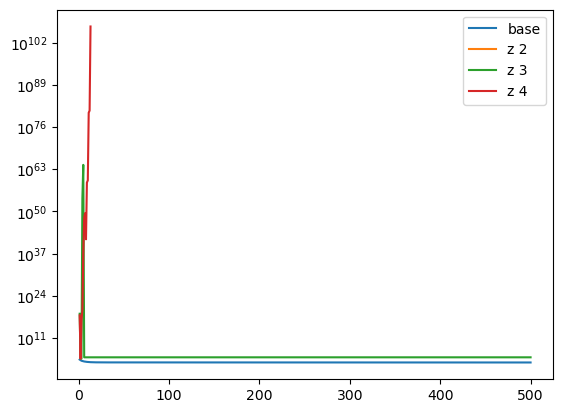

In [43]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_z3)
plt.plot(total_scores_z4)
plt.legend(['base', 'z 2', 'z 3', 'z 4'])

In [44]:
Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=3)
Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=4)

c:\Users\waqas\Desktop\seminmf\main.py:340: RuntimeWarning: overflow encountered in matmul
  H[j: j + 1, :] = hj = non_neg(wj.T @ Mj) / (np.linalg.norm(wj) ** 2)
c:\Users\waqas\miniconda3\envs\research\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [45]:
save_results(acc_filepath.format(rank, iters, reg, 'all3'), Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3)
save_results(acc_filepath.format(rank, iters, reg, 'all4'), Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4)
# Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3 = load_results(acc_filepath.format(rank, iters, reg, 'all3'))
# Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4 = load_results(acc_filepath.format(rank, iters, reg, 'all4'))

In [46]:
total_scores_all3 = fscores_all3 + lambda_vals_all3 * gscores_all3
total_scores_all4 = fscores_all4 + lambda_vals_all4 * gscores_all4

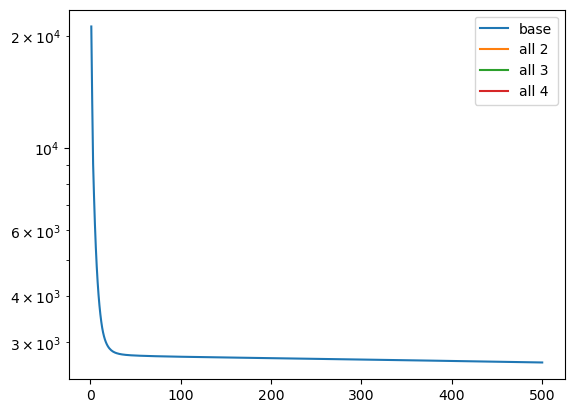

In [47]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_all2)
plt.plot(total_scores_all3)
plt.plot(total_scores_all4)
plt.legend(['base', 'all 2', 'all 3', 'all 4'])

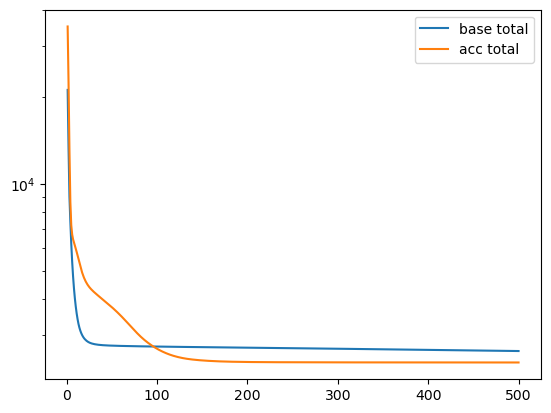

In [48]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_acc)

plt.legend(['base total', 'acc total'])